## Check heatmap of generator

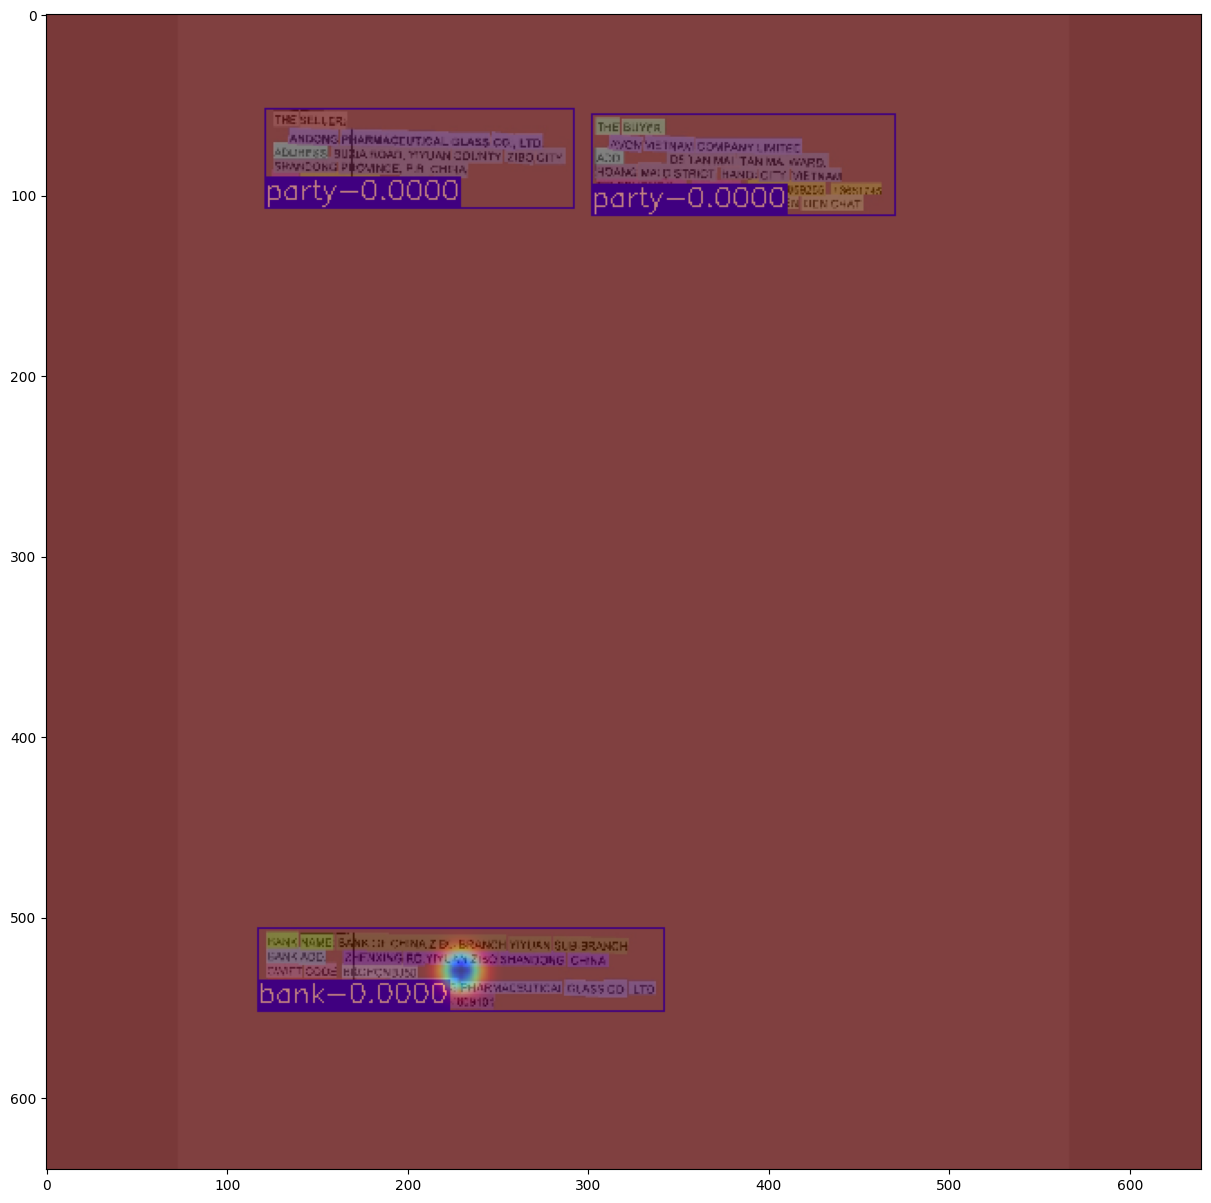

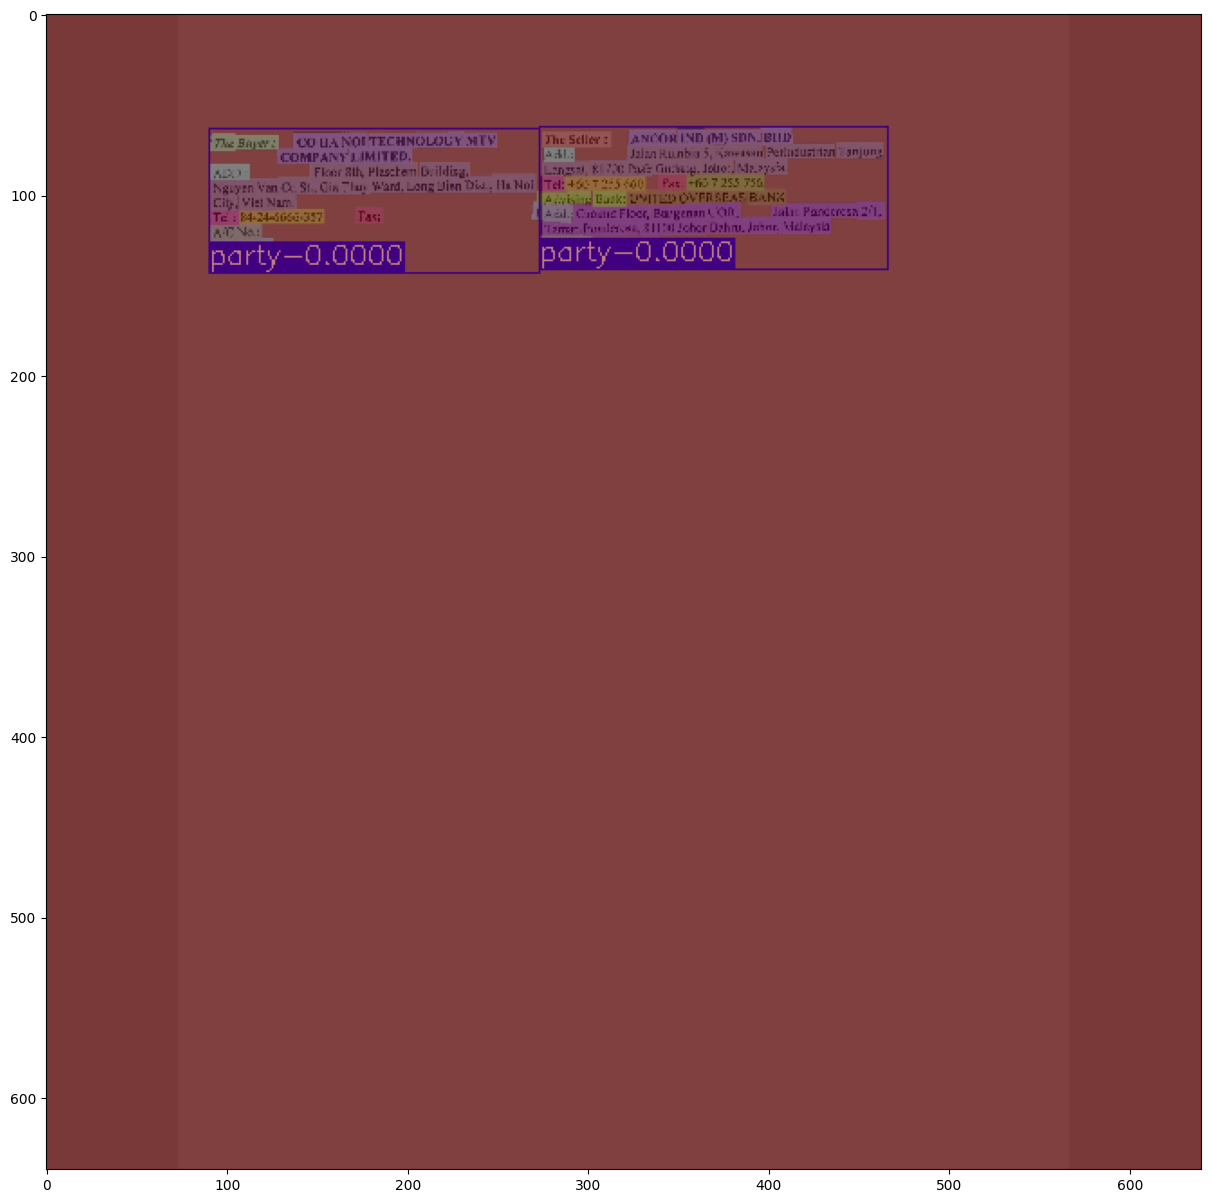

KeyboardInterrupt: Interrupted by user

In [2]:
from dataset.assigner import Assigner
from dataset.utils import parse_xml, Resizer
import yaml
import os
import cv2
import matplotlib.pyplot as plt

def draw_boxes(src_image, boxes, scores, labels):
    color = (0, 0, 255)
    for box, score, lb in zip(boxes, scores, labels):
        xmin, ymin, xmax, ymax = box.astype('int32')
        score = '{:.4f}'.format(score)
        label = '-'.join([lb, score])
        ret, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(src_image, (xmin, ymin), (xmax, ymax), color, 1)
        cv2.rectangle(src_image, (xmin, ymax - ret[1] - baseline), (xmin + ret[0], ymax), color, -1)
        cv2.putText(src_image, label, (xmin, ymax - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    return src_image

with open('config/default.yaml') as f:
    cfg = yaml.safe_load(f)
    
path = cfg['val']
assigner = Assigner(num_classes=2, input_size=640, stride=4, max_object=100)
resizer = Resizer(size=(640, 640), mode='letterbox')
mapper = cfg['names']
for name in os.listdir(path):
    fp = os.path.join(path, name)
    xp = fp.replace('images', 'annotations').replace('.jpg', '.xml')
    img = cv2.imread(fp)
    boxes, obj_names = parse_xml(xp)
    class_ids = [mapper[obj_name] for obj_name in obj_names]
     
    resized = resizer.resize_image(img)
    new_boxes = resizer.resize_boxes(boxes, img.shape[:2])
    ## Vẽ cái box lên
    resized = draw_boxes(resized, new_boxes, [0]*len(new_boxes), obj_names)
    
    #Overlay cái thằng hm lên
    hm, whm, reg, indices = assigner(new_boxes, class_ids)
    
    # Heatmap check done [v]
    heat = cv2.applyColorMap((hm[..., 1]*255).astype('uint8'), cv2.COLORMAP_JET)
    heat = cv2.resize(heat, (640, 640))
    resized = cv2.addWeighted(resized, 0.5, heat.astype('uint8'), 0.5, 0.0)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(resized)
    plt.show()
    input()

## Check model inference

In [3]:
#Check model infer
from model import Model
from dataset.assigner import Assigner
from dataset.utils import parse_xml, Resizer
import yaml
import os
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

def draw_boxes(src_image, boxes, scores, labels):
    color = (0, 0, 255)
    for box, score, lb in zip(boxes, scores, labels):
        xmin, ymin, xmax, ymax = box.astype('int32')
        score = '{:.4f}'.format(score)
        label = '-'.join([lb, score])
        ret, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(src_image, (xmin, ymin), (xmax, ymax), color, 1)
        cv2.rectangle(src_image, (xmin, ymax - ret[1] - baseline), (xmin + ret[0], ymax), color, -1)
        cv2.putText(src_image, label, (xmin, ymax - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    return src_image

with open('config/default.yaml') as f:
    cfg = yaml.safe_load(f)
    
assigner = Assigner(num_classes=2, input_size=640, stride=4, max_object=100)
resizer = Resizer(size=(640, 640), mode='letterbox')
mapper = cfg['names']
model = Model(version=cfg['version'], nc=cfg['nc'], max_boxes=cfg['max_boxes'], is_training=False)
model.load_state_dict(torch.load('save_dir/test/model_best.pth')['state_dict'])
model.eval()
model.cuda()

/data/sonnh8/torch_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load successfully yolov8 backbone weights !


Model(
  (backbone): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1

0.015994787216186523
[[     120.85      507.33      339.05       553.4]
 [     125.71      58.718      469.68      104.94]
 [        291       57.17      465.33      113.53]
 [     131.23      57.633      288.44      104.61]] [    0.77625     0.44531     0.36649     0.25504] [          1           0           0           0]


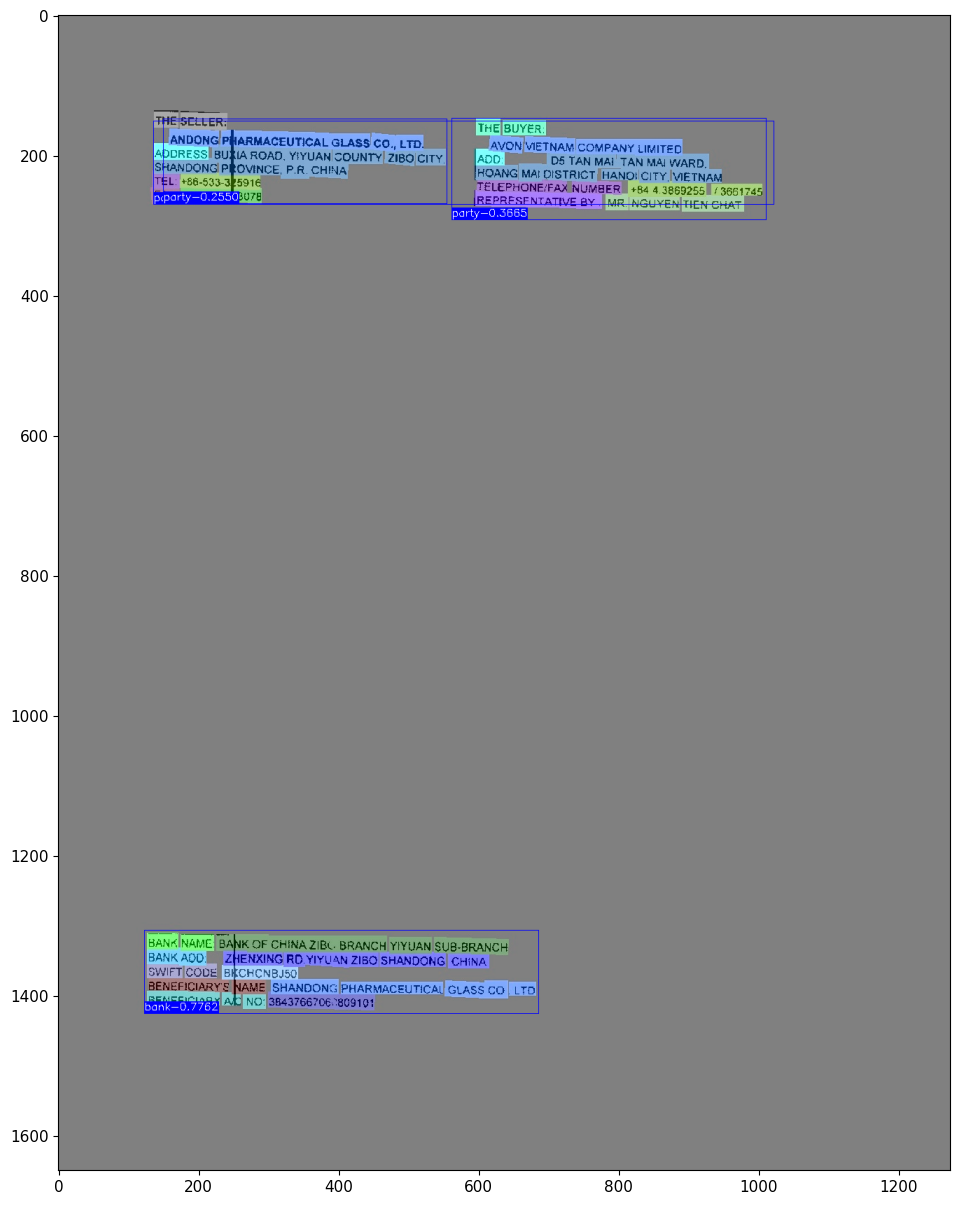

0.021013975143432617
[[     83.999       58.65      471.65      106.22]
 [     79.868      65.404       468.2      138.19]
 [     87.842      61.203      260.24      134.17]
 [     256.01      63.567      460.31       140.2]
 [     252.99      59.175      455.14      104.42]] [    0.58538     0.30895     0.20045      0.1887     0.12491] [          0           1           0           0           0]


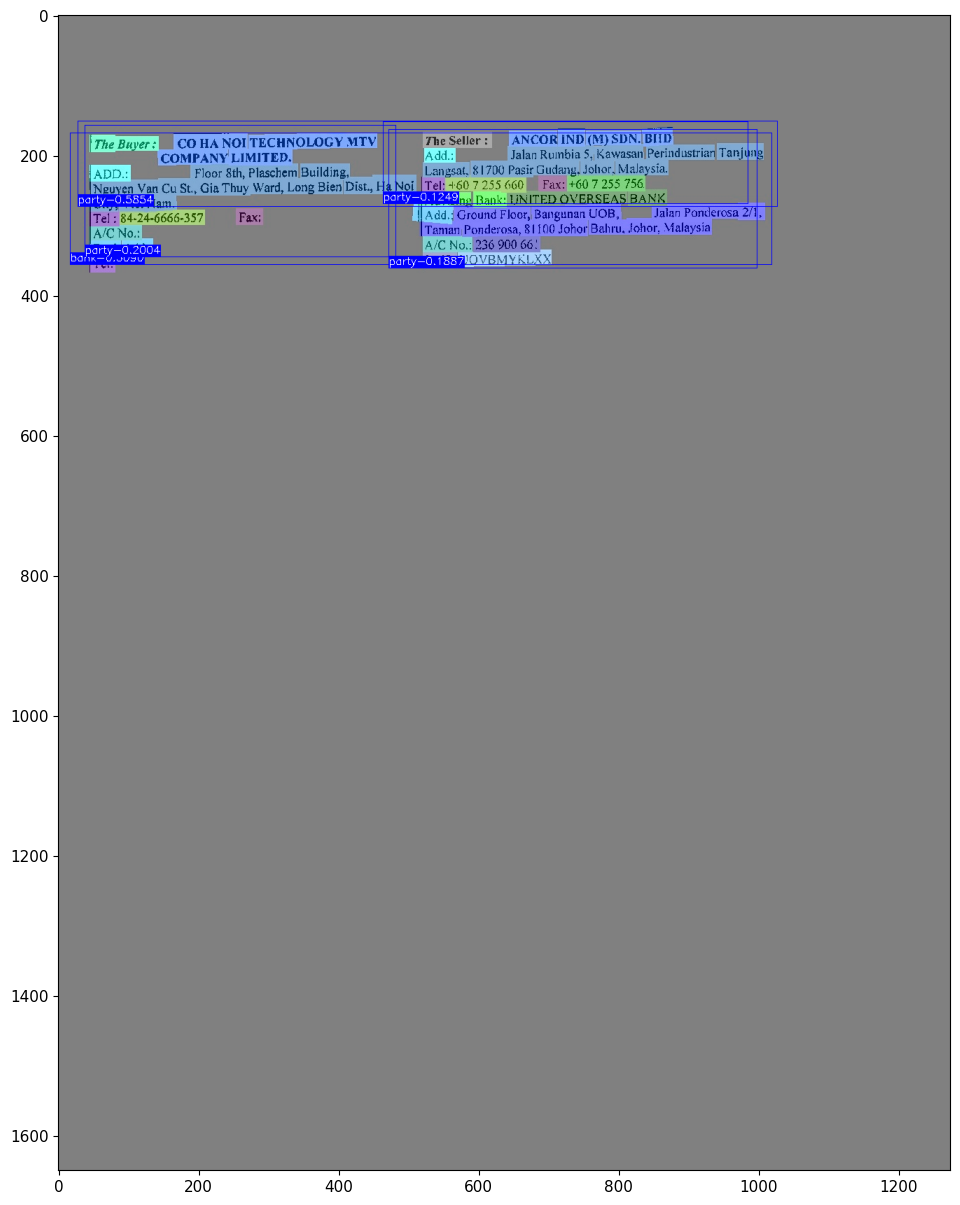

0.020578384399414062
[[     128.27       148.6      483.68      264.97]
 [        142      505.75      293.59      545.73]
 [     132.09      94.969      487.48      173.45]] [    0.91289     0.79535     0.63191] [          0           1           0]


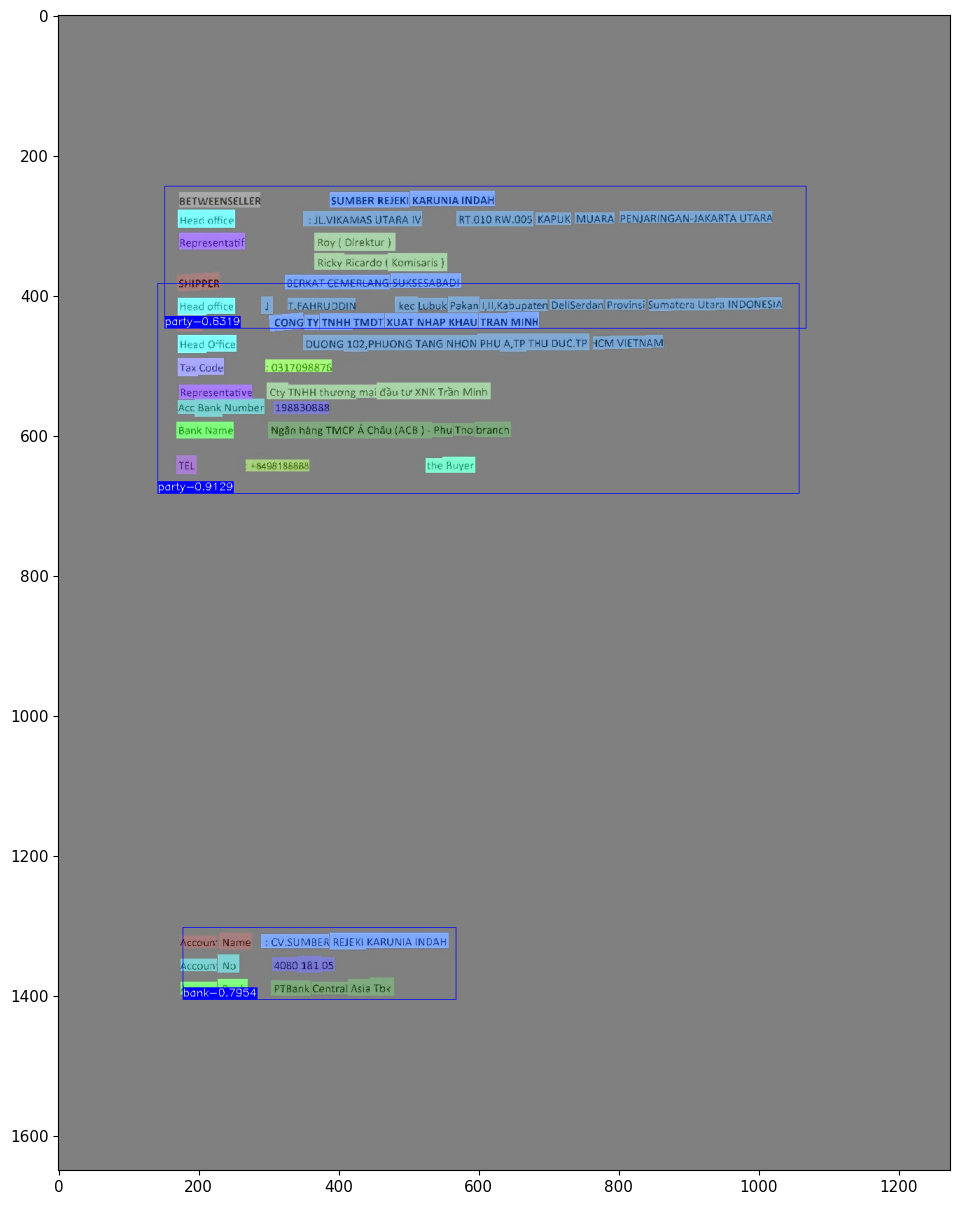

0.02764725685119629
[[     143.92        68.4      507.37      127.12]
 [      143.2      168.95      516.58      210.19]
 [     138.91      121.17      497.18      169.52]
 [      146.5      120.77      344.97      163.41]
 [        139      115.84      520.84      200.69]
 [      144.8      64.082      387.02      115.86]] [    0.57163     0.46169      0.4182     0.26627     0.22927     0.12705] [          0           0           0           0           0           0]


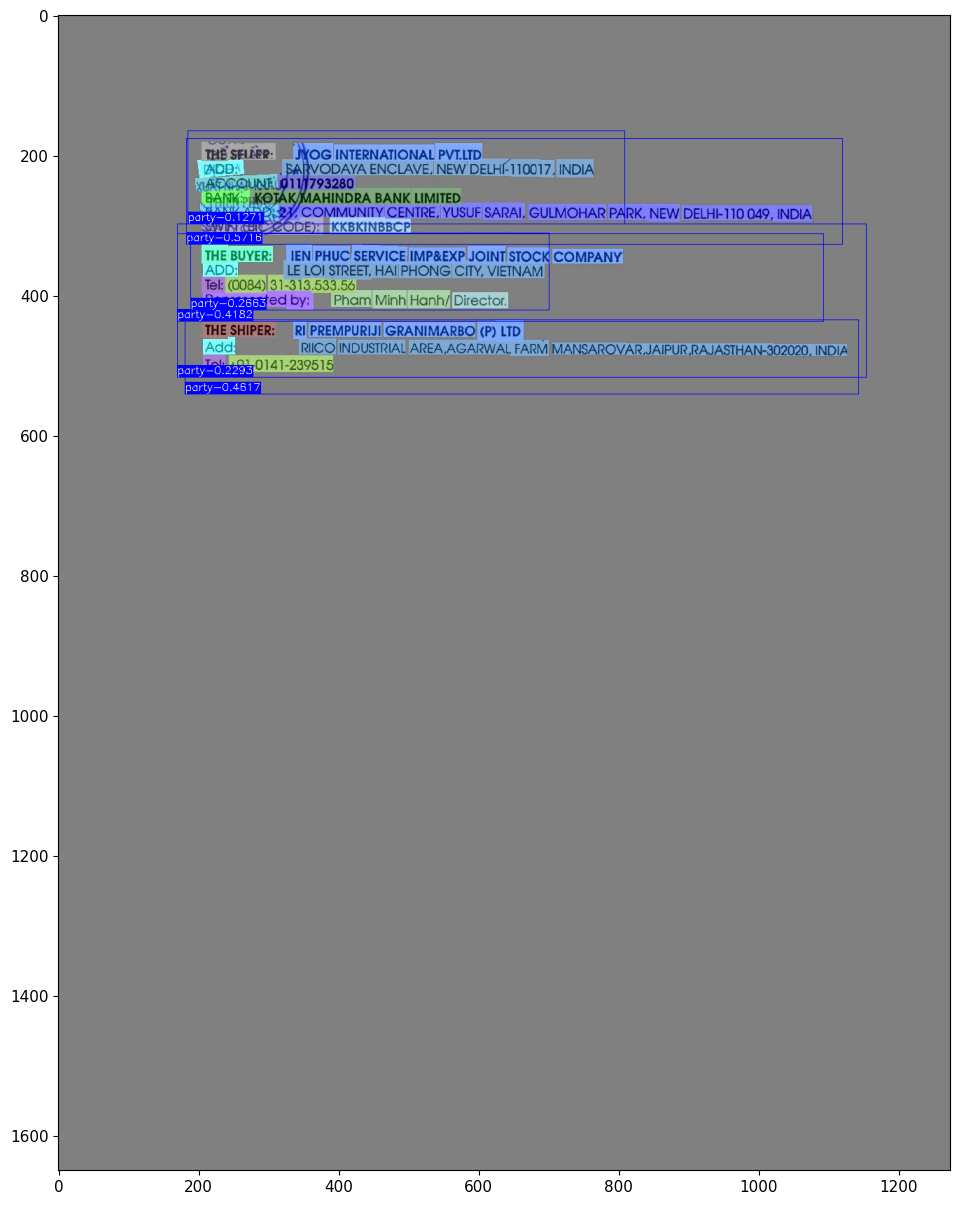

0.029803752899169922
[[     86.507      100.72      454.15      174.93]
 [     89.921      176.82      458.35      241.64]] [    0.92873     0.72166] [          0           0]


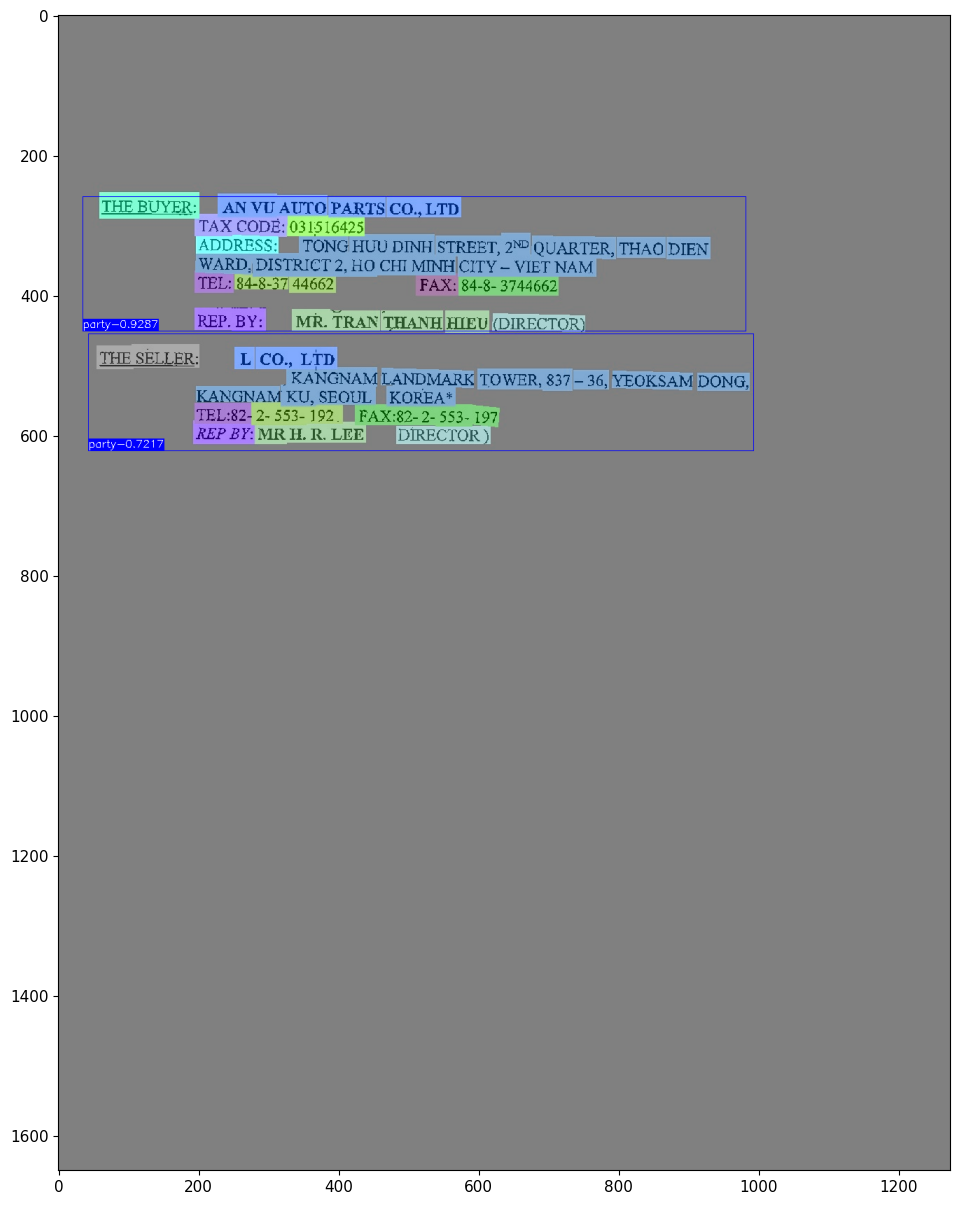

0.02344346046447754
[[     108.25      266.79      304.13      353.63]
 [     108.92      200.41      295.67      291.93]
 [     104.93      181.05      299.25      279.44]] [    0.55787     0.40782     0.38469] [          0           0           0]


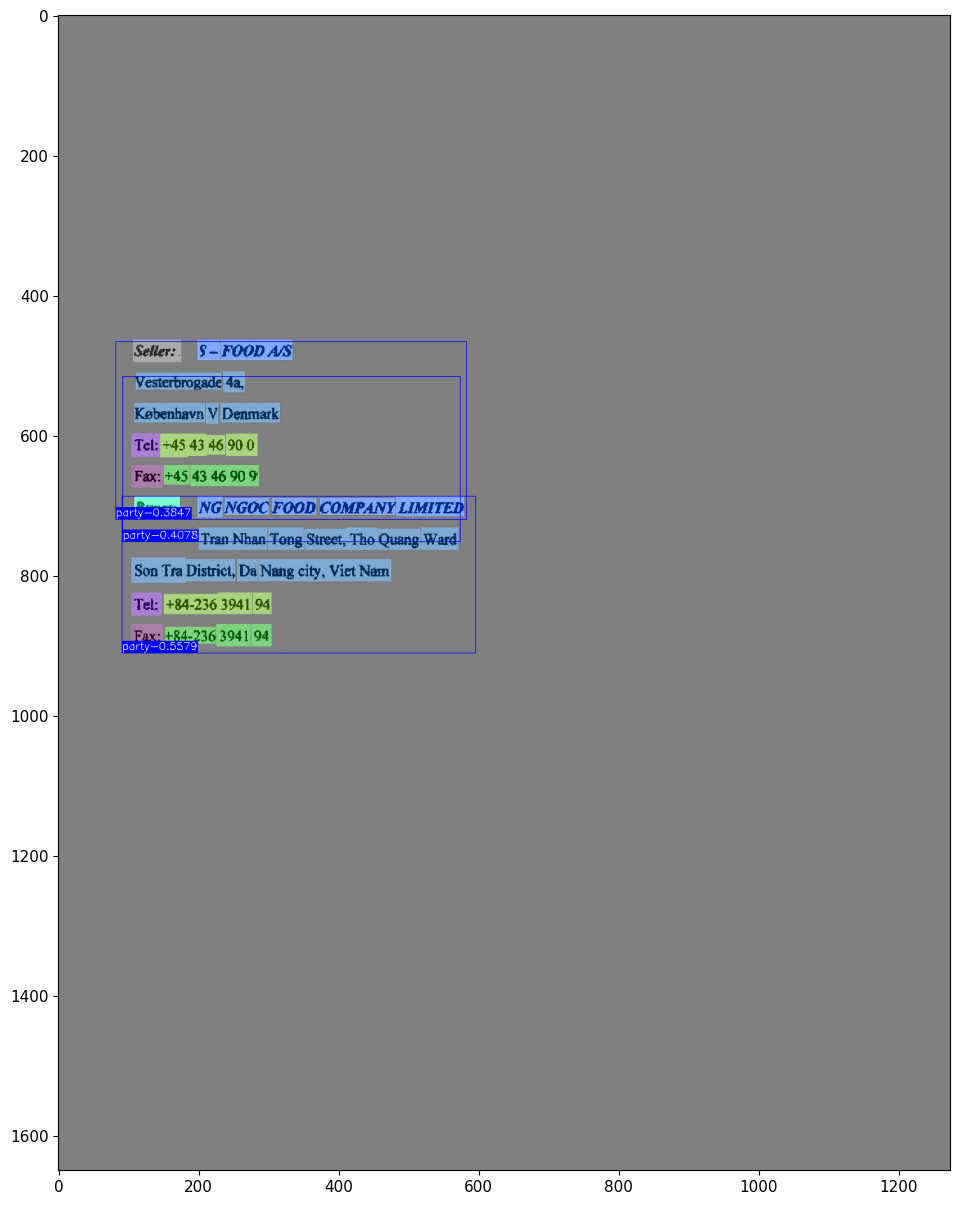

0.015196800231933594
[[     125.76      396.37      430.01      454.29]
 [     286.95      147.77      493.54      198.96]
 [     131.37       160.7      504.16      195.79]
 [     223.26       91.16      412.62      121.54]
 [     127.64      150.62      372.29      189.58]] [    0.82257     0.34109     0.29943     0.21271     0.19878] [          1           0           0           0           0]


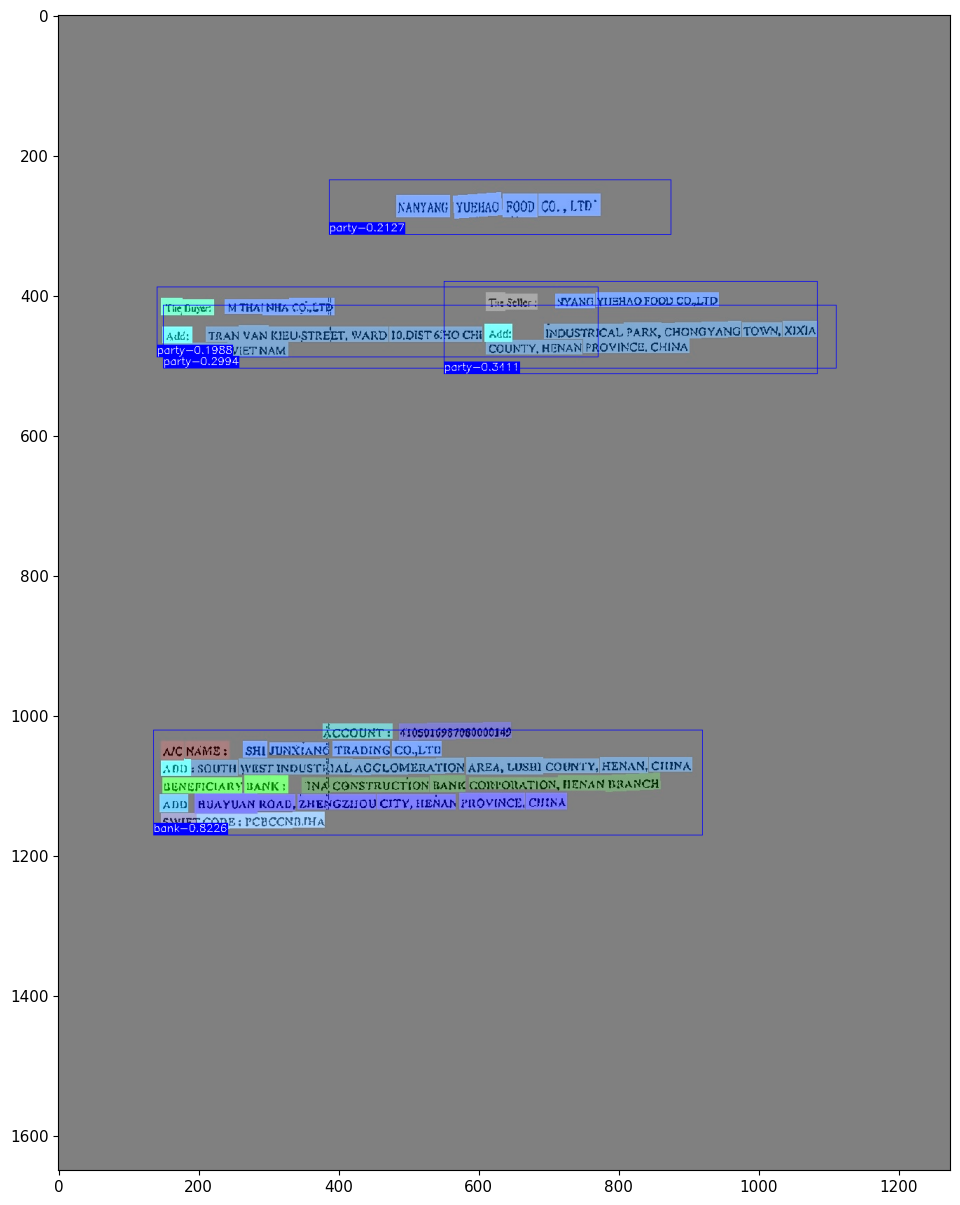

0.018049240112304688
[[      146.9      135.26      497.13      181.45]
 [     153.29      85.302       498.3      134.74]
 [     155.46      80.516      368.62      115.38]
 [     148.03      137.12      503.66      202.39]
 [     153.21      170.99      514.75      202.11]
 [     146.84      82.946       504.8      177.61]
 [     146.84      82.946       504.8      177.61]
 [     156.17       129.5       343.5      179.72]] [    0.46625     0.36768     0.34788     0.33788     0.22417     0.15558     0.12786     0.12043] [          0           0           0           1           0           1           0           0]


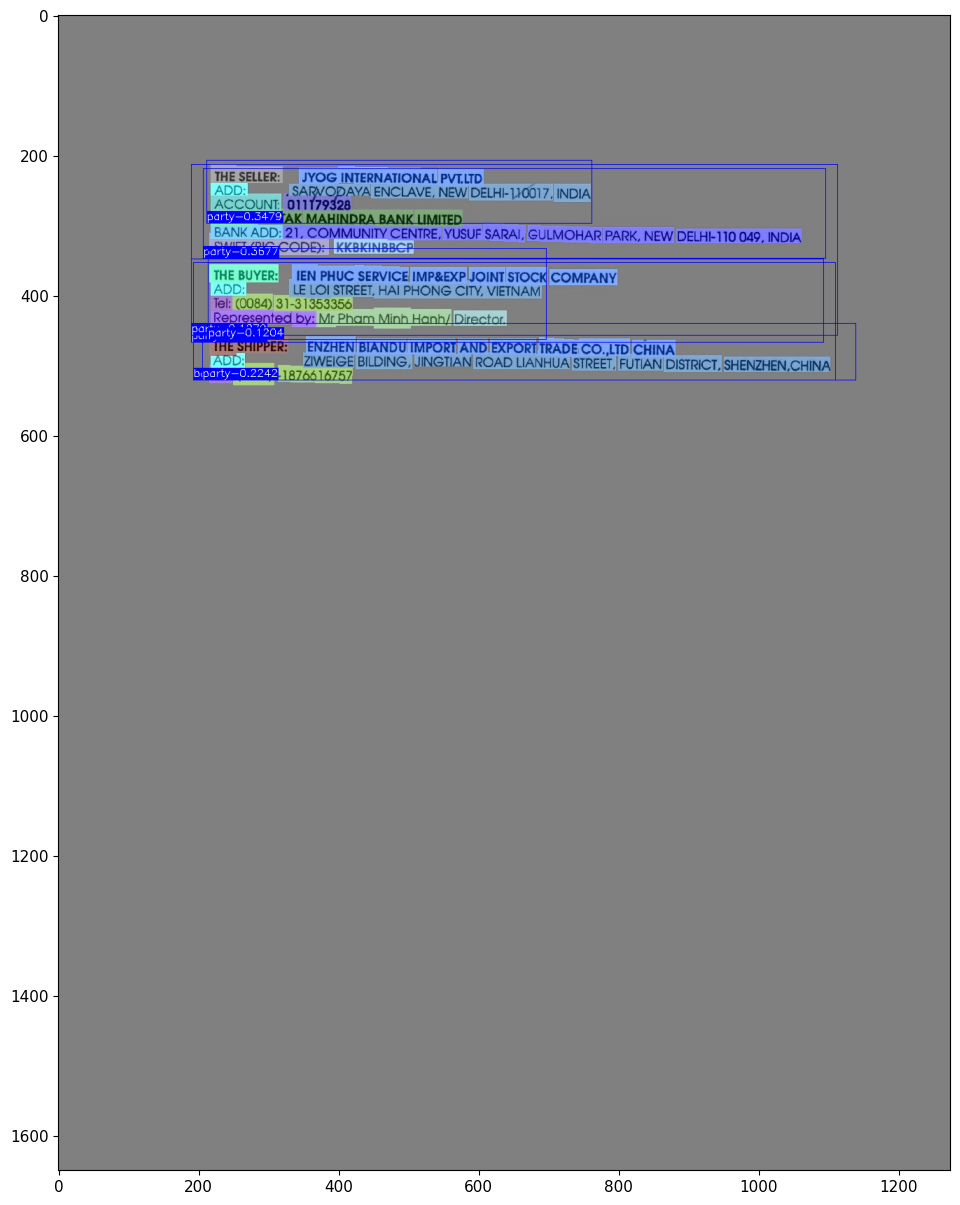

0.02300119400024414
[[     124.97      127.14      502.32      155.97]
 [     131.87      339.62      344.27      439.38]
 [     125.32      90.368      502.33      138.42]
 [     124.68      62.068       494.4      102.12]
 [      133.3      334.86      349.79      422.48]] [    0.71491     0.50079     0.44988     0.37949     0.25004] [          0           1           0           0           0]


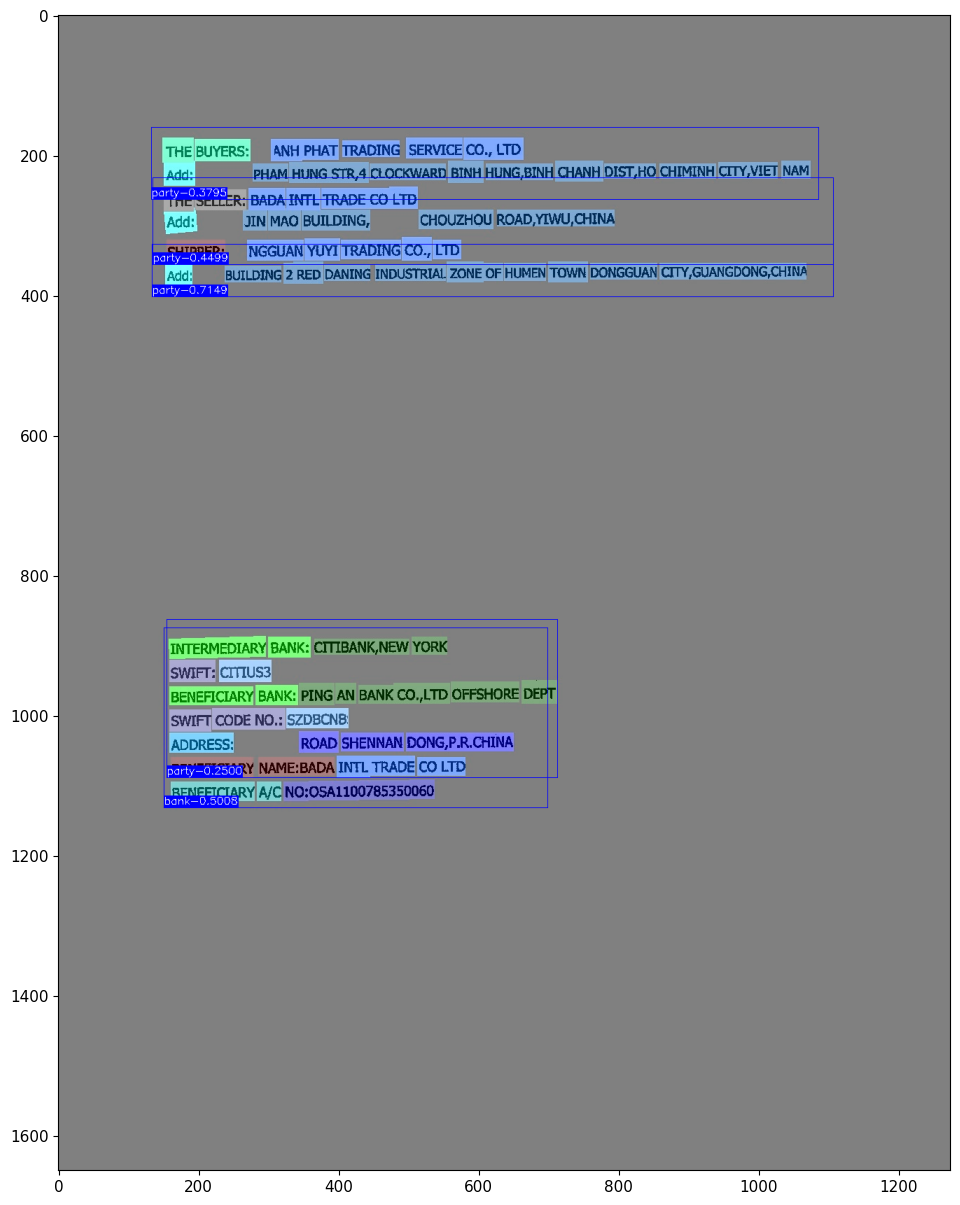

0.01848888397216797
[[     90.034      108.05      378.69      159.06]
 [     93.439      154.72      374.35      217.37]
 [      87.96      113.77      395.31       227.1]] [    0.88982     0.87486     0.13246] [          0           0           0]


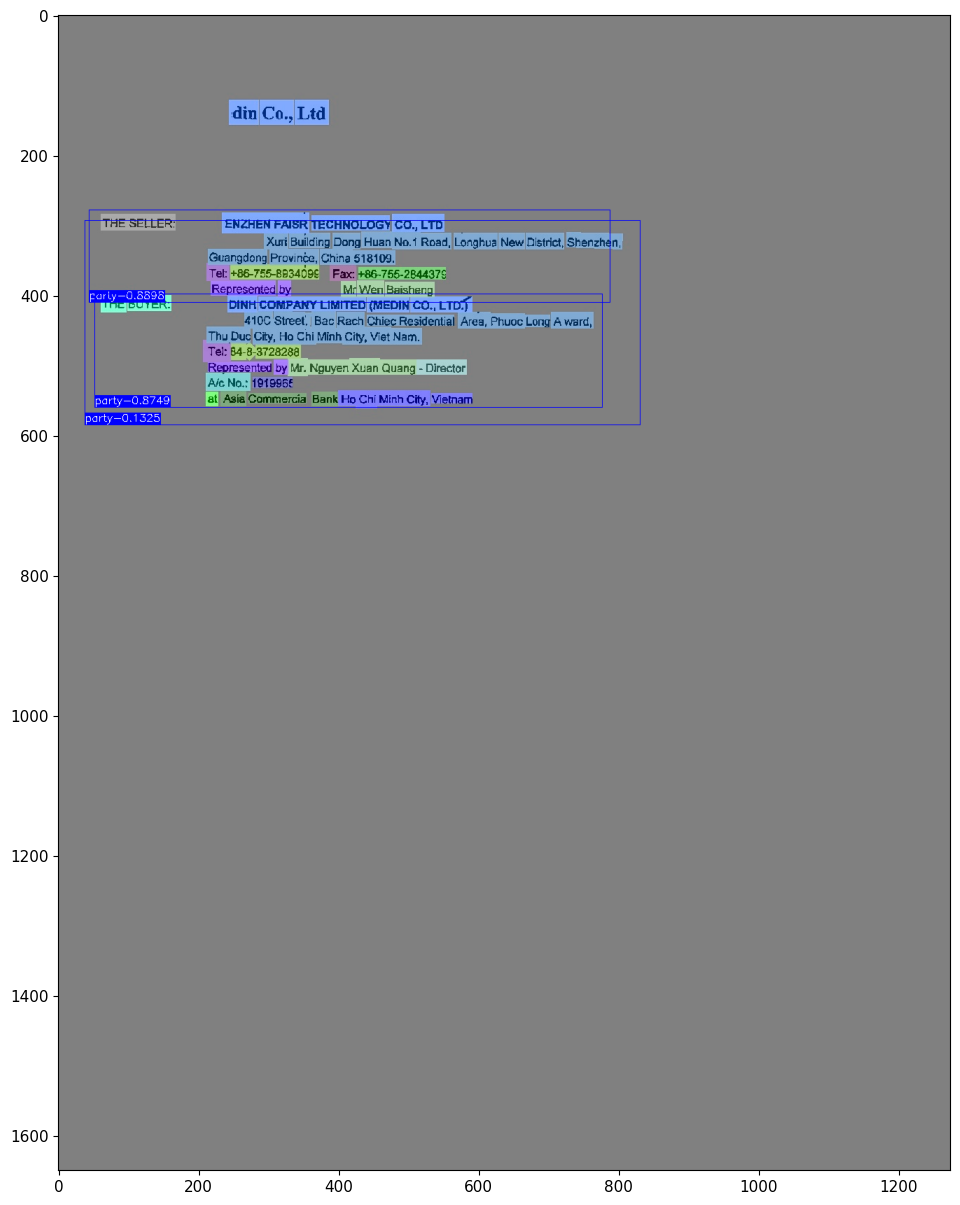

0.016887903213500977
[[     148.11      92.633      416.02      159.38]
 [     145.39      165.97       362.3      213.01]] [    0.76084     0.68794] [          0           0]


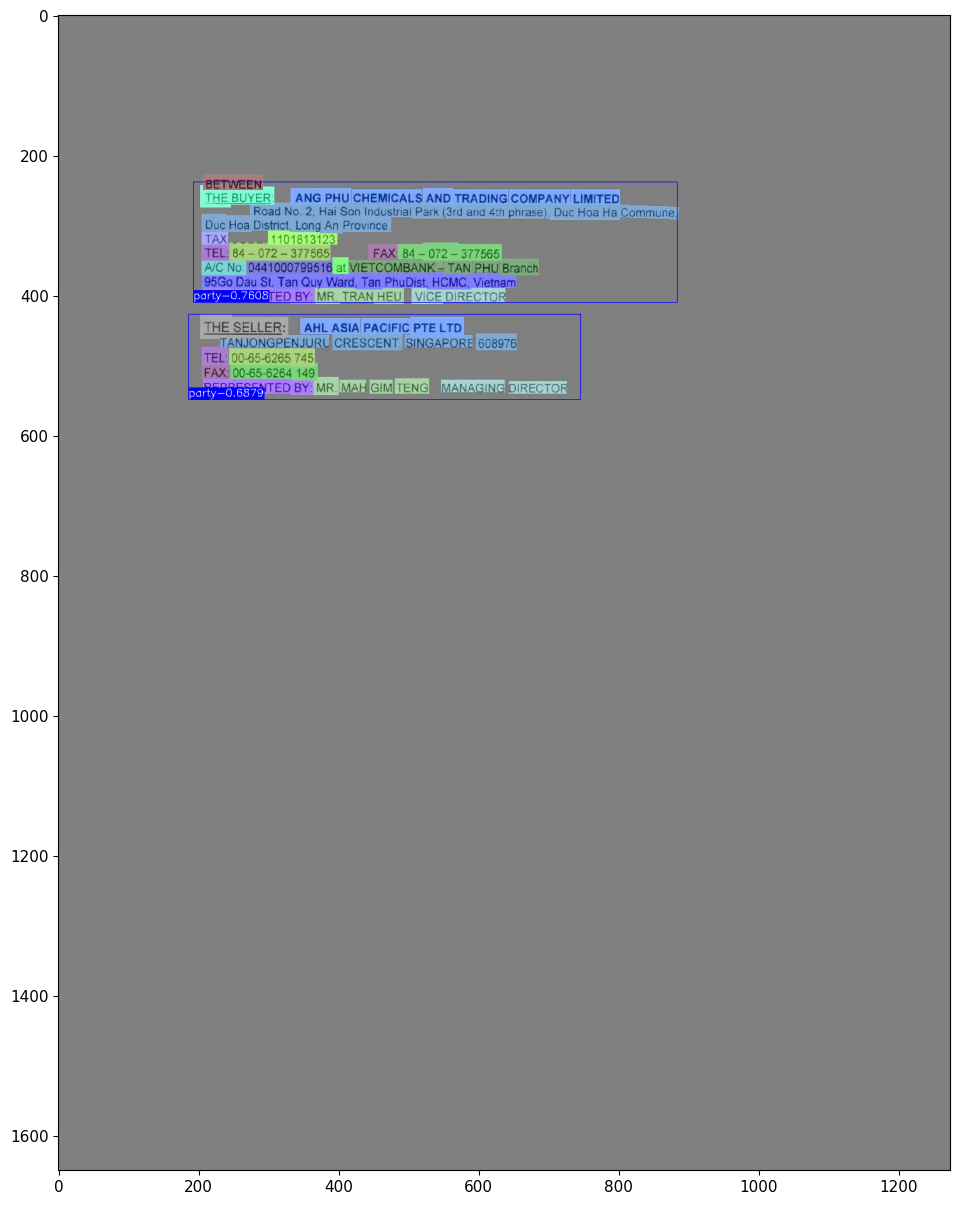

KeyboardInterrupt: Interrupted by user

In [9]:
# %matplotlib inline
from time import time

path = cfg['val']
for name in os.listdir(path):
    fp = os.path.join(path, name)
    xp = fp.replace('images', 'annotations').replace('.jpg', '.xml')
    img = cv2.imread(fp)
    # boxes, obj_names = parse_xml(xp)
    # class_ids = [mapper[obj_name] for obj_name in obj_names]
    
    # resized, new_boxes = resizer(img, boxes)
    resized = resizer.resize_image(img)
    tensor_in = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    tensor_in = tensor_in.astype(np.float32) / 255.0
    tensor_in = np.expand_dims(np.transpose(tensor_in, (2, 0, 1)), 0)
    tensor_in = torch.from_numpy(tensor_in).cuda()
    # print(tensor_in.shape)
    ## Vẽ cái box lên
    # resized = draw_boxes(resized, new_boxes, [0]*len(new_boxes), obj_names)
    s = time()
    res = model(tensor_in)[0].cpu().detach().numpy()
    print(time() - s)
    boxes, scores, class_ids = res[:, :4], res[:, 4], res[:, 5]
    idxs = np.where(scores > 0.1)
    boxes = boxes[idxs] * 4
    scores = scores[idxs]
    class_ids = class_ids[idxs]
    class_names = ['party' if c == 0 else 'bank' for c in class_ids]
    print(boxes, scores, class_ids)
    boxes = resizer.rescale_boxes(boxes, img.shape[:2])
    img = draw_boxes(img, boxes.astype('int32'), scores, class_names)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()
    input()